## Note too self:
I am still getting that problem with the diameter estimation... It feels like it just does not make the right choices for this, always too small. I question if it Is possible to implement my own algorithm for it based on the length measurements, though I feel like that will just lead to more problems in the long run and that still will not fix my problem with long cells. 

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io
from PIL import Image
import cv2
from cellpose import models, io
import tools

my_data = "example_data/Height/"
save_path = "example_data/cellpose_output/"

## Step 1: 
Create a list of files that contains the path for everything in your folder of images. 

In [2]:
files = os.listdir(my_data)
for fichier in files[:]: # filelist[:] makes a copy of filelist.
    if not(fichier.endswith(".png")):
        files.remove(fichier)
        
# Sort files by timepoint
files.sort(key = tools.natural_keys)      

save_names = [save_path + file for file in files]
file_names = [my_data + file for file in files]

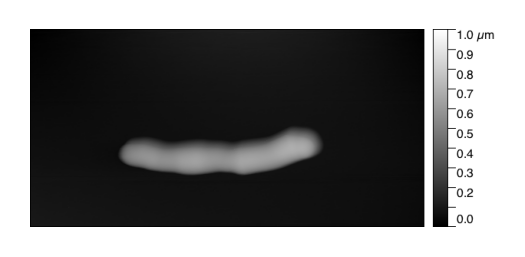

In [3]:
# view 1 image
img = io.imread(file_names[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

## Step 2:
Running cellpose on every file within our data folder and saving the output to our save path. 

In [6]:
# RUN CELLPOSE

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]

# or if you have different types of channels in each image
channels = [0,0]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# or in a loop
for filename, savename in zip(file_names, save_names):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter = 80, channels=channels, flow_threshold = 0.8)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, savename, channels)

    #save results as png
    io.save_to_png(img, masks, flows, savename)

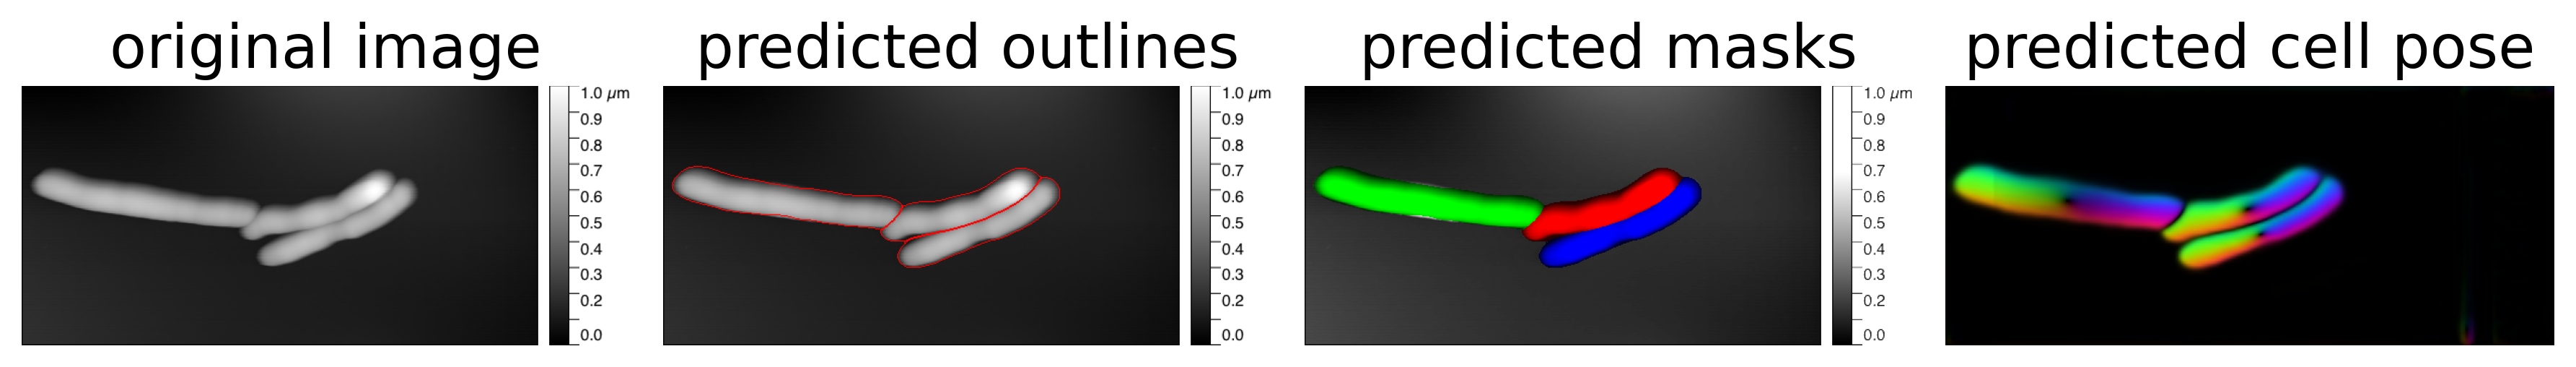

In [7]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()